In [43]:
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import resize
from sklearn import svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, learning_curve, validation_curve, StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split



In [44]:
# data paths for dataset
X_Cats = "./input/Dataset/cats/"
X_Dogs = "./input/Dataset/dogs/"

# Constant
IMAGE_RESIZE_SIZE = (200, 200, 3)


In [45]:
def train_data():
    """
    Method to preprocess the training data
    """
    images = []
    labels = []
    
    img_dog = []
    target_value_dog_images = []
    dogs_data = next(os.walk(X_Dogs))
    print(f'Train dog images count: {len(dogs_data[2])}')
    for file in dogs_data[2]:
        img_x = rgb2gray(resize(cv2.imread(dogs_data[0] + file), IMAGE_RESIZE_SIZE))
        img_x = np.ravel(img_x)
        img_dog.append(img_x)
        target_value_dog_images.append(0)
    
    images.extend(img_dog)
    labels.extend(target_value_dog_images)

    img_cat = []
    target_value_for_cat_data = []
    cats_data = next(os.walk(X_Cats))
    print(f'Train cat images count: {len(cats_data[2])}')
    for file in cats_data[2]:
        img_x = rgb2gray(resize(io.imread(cats_data[0] + file), IMAGE_RESIZE_SIZE))
        img_x = np.ravel(img_x)
        img_cat.append(img_x)
        target_value_for_cat_data.append(1)
   
    images.extend(img_cat)
    labels.extend(target_value_for_cat_data)
    images, labels = np.asarray(images), np.asarray(labels)
    
    return images, labels

In [46]:
def plot_learning_curve(
        estimator, X, y, title="Learning Curve", cv=None,
        train_sizes=np.linspace(0.1, 1.0, 5)
):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # Get learning curve data
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=cv, n_jobs=-1,
                                                                         train_sizes=train_sizes, return_times=True)

    # Calculate mean and standard deviation for training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.grid()

    # Plot training curve with filled error band
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

    # Plot testing curve with filled error band
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")

    # Plot training times
    plt.figure()
    plt.title("Scalability of the model")
    plt.xlabel("Training examples")
    plt.ylabel("Fit times (seconds)")
    plt.grid()
    plt.plot(train_sizes, fit_times.mean(axis=1), 'o-')
    plt.show()
    
    
def plot_validation_curve(estimator, X, y, param_name, param_range, scoring='accuracy', cv=5):
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        scoring=scoring, cv=cv, n_jobs=-1
    )
    
    # Compute mean and standard deviation for training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot validation curve
    plt.figure()
    plt.title(f"Validation Curve for {param_name}")
    plt.xlabel(param_name)
    plt.ylabel("Accuracy")
    plt.grid()

    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.plot(param_range, train_scores_mean, 'o-', color="r", label="Training score")

    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(param_range, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

    

## KNN Classification

In [47]:
### Training KNeighboursClassifier
training_images, training_labels = train_data()
neigh = KNeighborsClassifier()

Train dog images count: 348
Train cat images count: 349


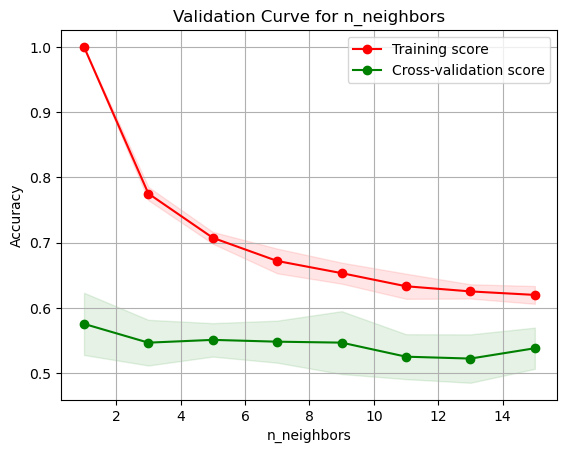

In [48]:
param_range_neighbors = [1, 3, 5, 7, 9, 11, 13, 15]
plot_validation_curve(
    estimator=neigh, X=training_images, y=training_labels, 
    param_name='n_neighbors', param_range=param_range_neighbors,
)

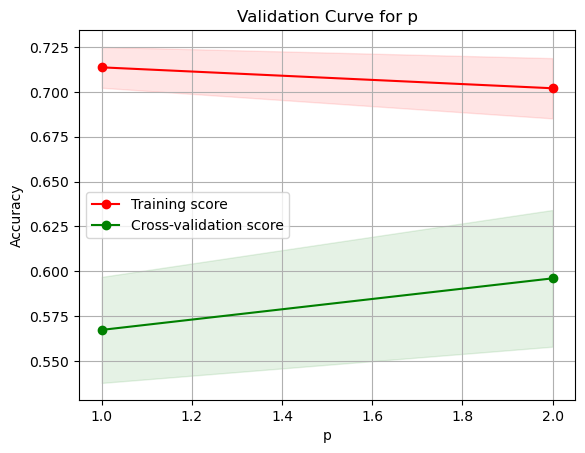

In [13]:
param_range_p = [1, 2]
plot_validation_curve(
    estimator=neigh, X=training_images, y=training_labels, 
    param_name='p', param_range=param_range_p,
)

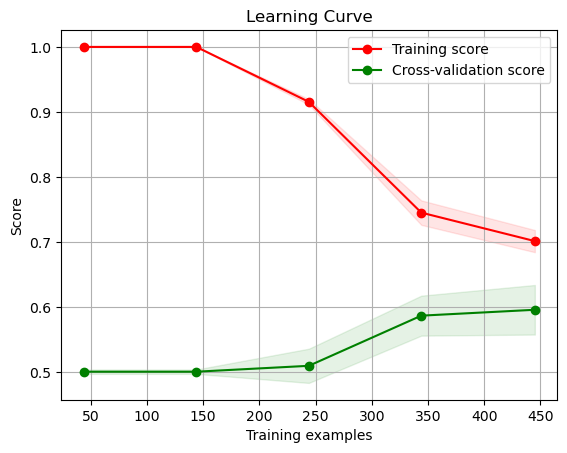

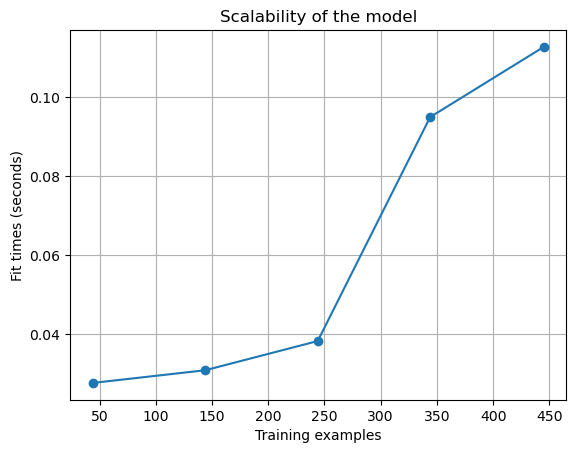

In [14]:
plot_learning_curve(neigh, training_images, training_labels, title="Learning Curve")

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(training_images, training_labels, test_size = 0.25, random_state = 0)


In [53]:
# Redefine model with best params
neigh = KNeighborsClassifier(n_neighbors=5, p=2)
neigh.fit(X_train, Y_train)

KNeighborsClassifier()

In [54]:
neigh.score(X_test, Y_test)

0.5657142857142857

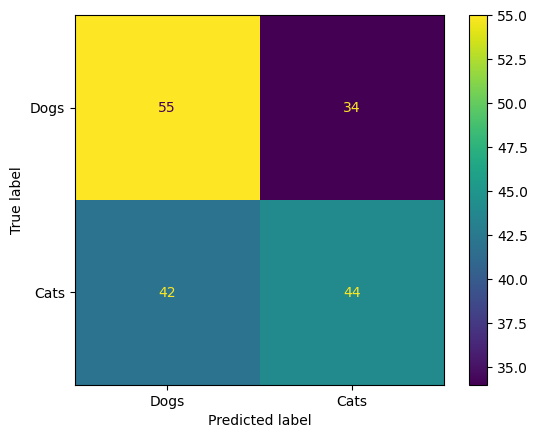

In [55]:
y_predict = neigh.predict(X_test)
confusion_matrix_data = confusion_matrix(y_true=Y_test, y_pred=y_predict)

confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_data, display_labels=('Dogs', 'Cats'))
confusion_matrix_display.plot()
plt.show()

## SVM Classifier

Using rbf and linear kernels

### RBF SVC

In [56]:
rbf_svc = svm.SVC(kernel='rbf')

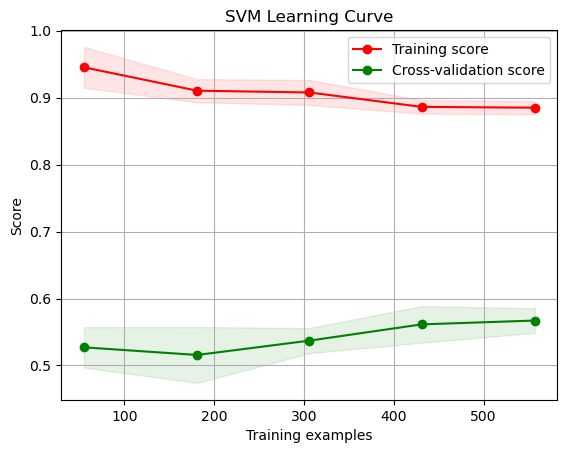

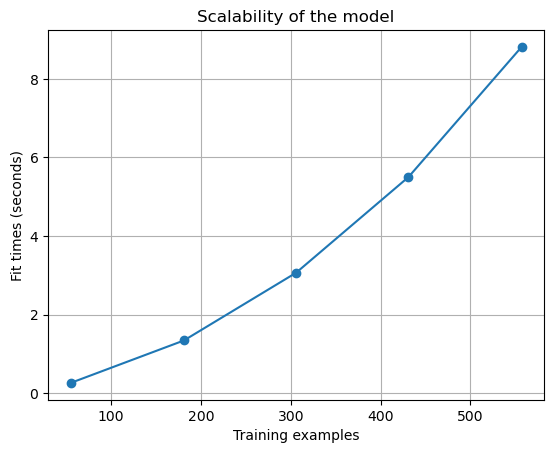

In [57]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
plot_learning_curve(rbf_svc, training_images, training_labels, title="SVM Learning Curve", cv=cv)

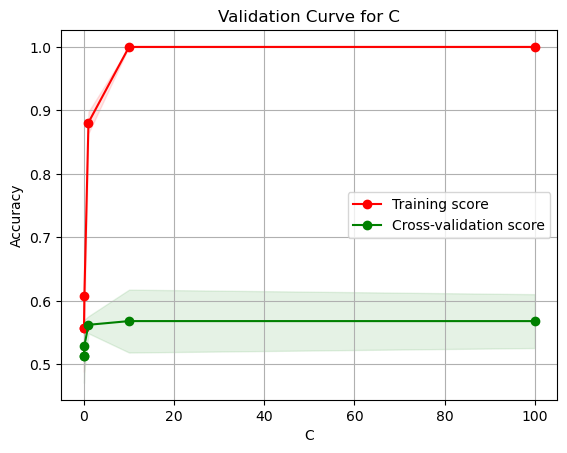

In [58]:
# Varying the regularization parameter (C)
param_range_C = np.logspace(-3, 2, 6)
plot_validation_curve(rbf_svc, training_images, training_labels, param_name="C", param_range=param_range_C)

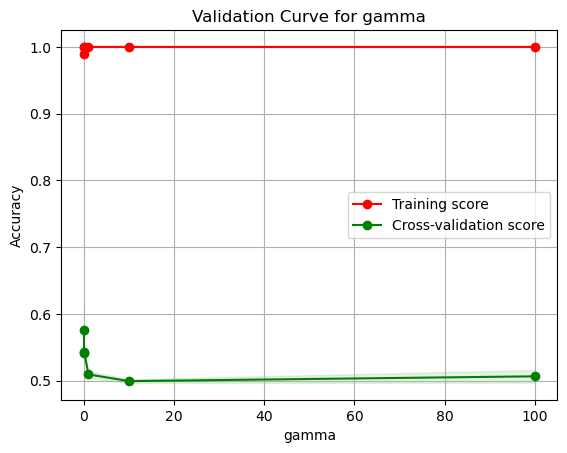

In [59]:
# Varying the gamma parameter for RBF kernel
param_range_gamma = np.logspace(-3, 2, 6)
plot_validation_curve(rbf_svc, training_images, training_labels, param_name="gamma", param_range=param_range_gamma)

## Linear SVC

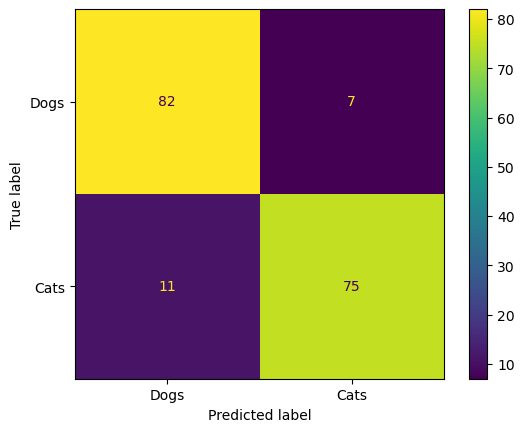

In [60]:
rbf_svc.fit(training_images, training_labels)
y_predict = rbf_svc.predict(X_test)
confusion_matrix_data = confusion_matrix(y_true=Y_test, y_pred=y_predict)

confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_data, display_labels=('Dogs', 'Cats'))
confusion_matrix_display.plot()
plt.show()

In [61]:
linear_svc = svm.SVC(kernel='linear')

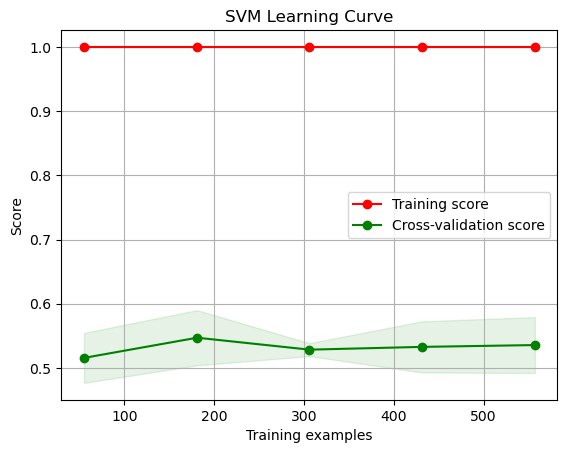

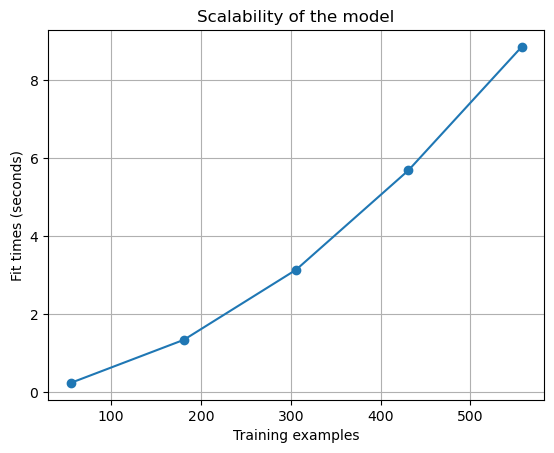

In [62]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
plot_learning_curve(linear_svc, training_images, training_labels, title="SVM Learning Curve", cv=cv)

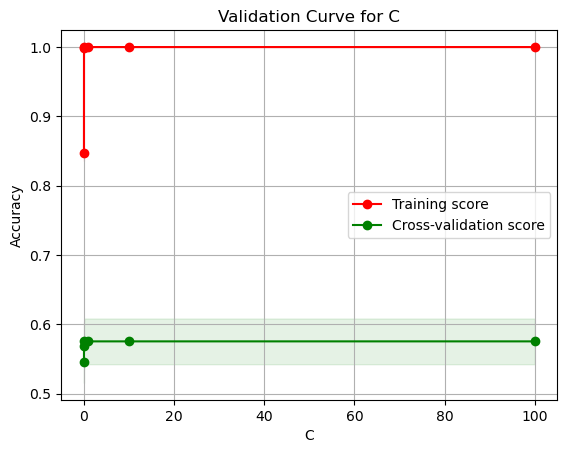

In [63]:
# Varying the C parameter
param_range_C = [0.001, 0.01, 0.1, 1, 10, 100]
plot_validation_curve(linear_svc, training_images, training_labels, param_name="C", param_range=param_range_C)

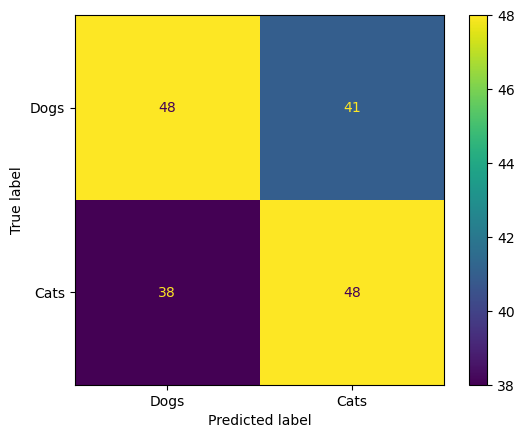

0.52

In [66]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(X_train, Y_train)
y_predict = rbf_svc.predict(X_test)
confusion_matrix_data = confusion_matrix(y_true=Y_test, y_pred=y_predict)

confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_data, display_labels=('Dogs', 'Cats'))
confusion_matrix_display.plot()
plt.show()
linear_svc.score(X_test, Y_test)

## MLP Classifier

In [84]:
mlpc = MLPClassifier(max_iter=4000, random_state=42)

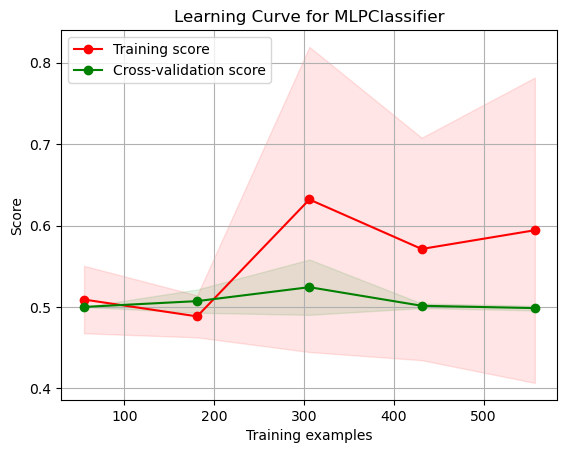

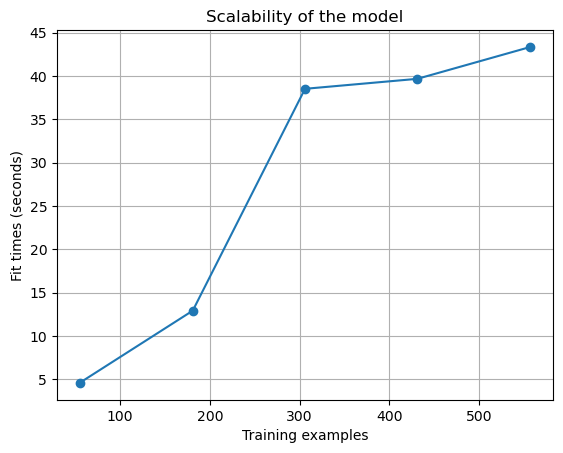

In [85]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
plot_learning_curve(mlpc, training_images, training_labels, title="Learning Curve for MLPClassifier", cv=cv)


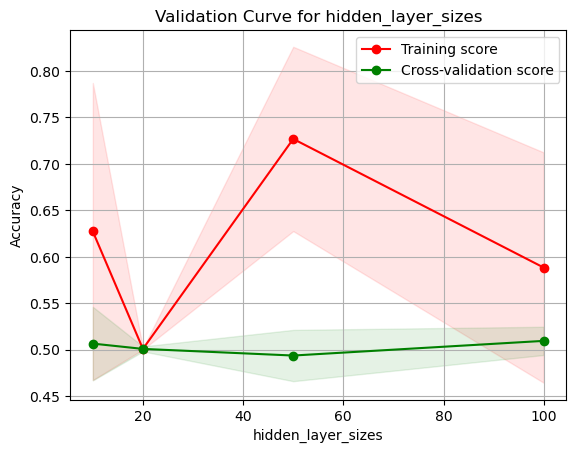

In [72]:

# Varying the number of hidden layers (neurons in the hidden layer)
param_range_hidden_layer_sizes = [10, 20, 50, 100]
plot_validation_curve(mlpc, training_images, training_labels, param_name="hidden_layer_sizes", param_range=param_range_hidden_layer_sizes)

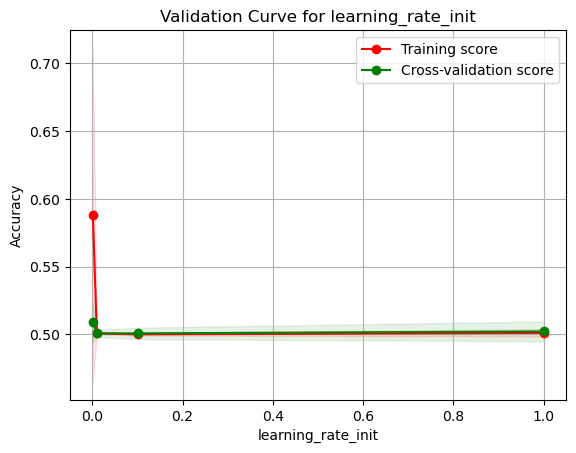

In [73]:
# Varying the learning rate
param_range_learning_rate = [0.001, 0.01, 0.1, 1.0]
mlp_learning_rate = MLPClassifier(max_iter=4000, random_state=42, hidden_layer_sizes=(100,))
plot_validation_curve(mlp_learning_rate, training_images, training_labels, param_name="learning_rate_init", param_range=param_range_learning_rate)

In [87]:
mlpc.fit(X_train, Y_train)
mlpc.score(X_test, Y_test)

0.49142857142857144

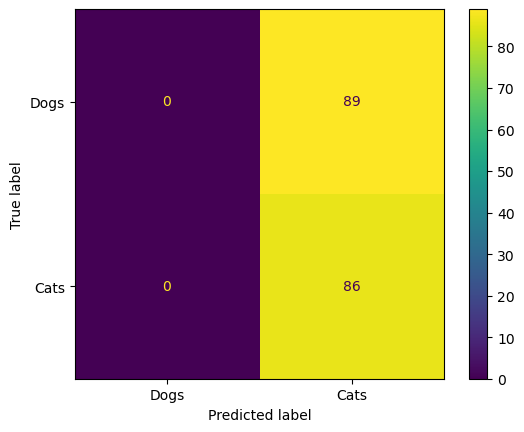

In [88]:
y_predict = mlpc.predict(X_test)
confusion_matrix_data = confusion_matrix(y_true=Y_test, y_pred=y_predict)

confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_data, display_labels=('Dogs', 'Cats'))
confusion_matrix_display.plot()
plt.show()

In [89]:
from sklearn.tree import DecisionTreeClassifier
parameter = {
    'criterion' :['entropy','gini','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}
model = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(model,param_grid = parameter,cv = 5)
cv.fit(X_train,Y_train)
cv.score(X_test, Y_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-p

0.5142857142857142

[[18 71]
 [14 72]]


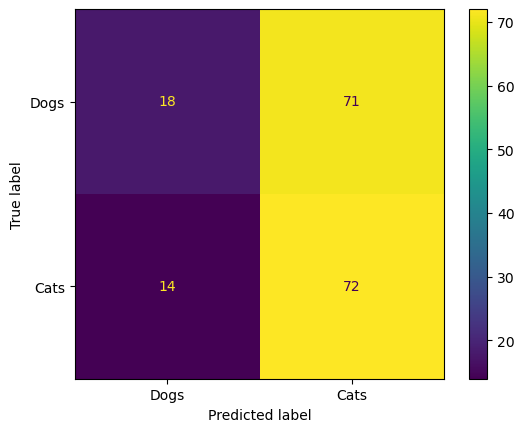

In [93]:
y_predict = cv.predict(X_test)
confusion_matrix_data = confusion_matrix(y_true=Y_test, y_pred=y_predict)

confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_data, display_labels=('Dogs', 'Cats'))
confusion_matrix_display.plot()
print(confusion_matrix_data)